## Loading Necessary Libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=(18,10)

<h1>Loading The DataSet</h1>

In [2]:
df = pd.read_csv('uci-electricity-usage/uci-electricity-usage.csv')
df.head()

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/1/16 17:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/1/16 17:10,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/1/16 17:20,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/1/16 17:30,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/1/16 17:40,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<h1>Exploratory Data Analysis</h1>

In [3]:
df.shape

(19735, 30)

In [4]:
df.isna().sum()

date                 0
target_appliances    0
target_lights        0
target_total         0
T1                   0
RH_1                 0
T2                   0
RH_2                 0
T3                   0
RH_3                 0
T4                   0
RH_4                 0
T5                   0
RH_5                 0
T6                   0
RH_6                 0
T7                   0
RH_7                 0
T8                   0
RH_8                 0
T9                   0
RH_9                 0
T_out                0
Press_mm_hg          0
RH_out               0
Windspeed            0
Visibility           0
Tdewpoint            0
rv1                  0
rv2                  0
dtype: int64

In [5]:
df.describe()

,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
#Except Date column, the rest of the data are all numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date                 19735 non-null object
target_appliances    19735 non-null int64
target_lights        19735 non-null int64
target_total         19735 non-null int64
T1                   19735 non-null float64
RH_1                 19735 non-null float64
T2                   19735 non-null float64
RH_2                 19735 non-null float64
T3                   19735 non-null float64
RH_3                 19735 non-null float64
T4                   19735 non-null float64
RH_4                 19735 non-null float64
T5                   19735 non-null float64
RH_5                 19735 non-null float64
T6                   19735 non-null float64
RH_6                 19735 non-null float64
T7                   19735 non-null float64
RH_7                 19735 non-null float64
T8                   19735 non-null float64
RH_8                 19735 non-null float64
T9                

<h3>Some Visualizations</h3>

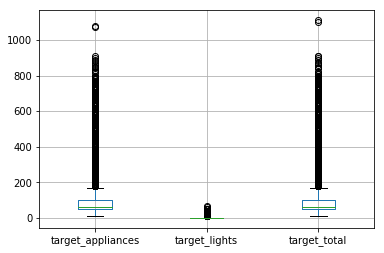

In [7]:
df.boxplot(['target_appliances', 'target_lights','target_total'])
plt.show()

Text(0, 0.5, 'Power Consumption(KwHr)')

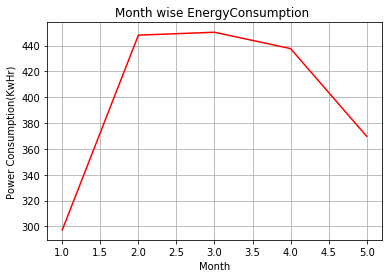

In [8]:
df3=df.copy()
df3['date'] = pd.to_datetime(df3['date'], format='%d/%m/%y %H:%M')
df3['powerConsumed_kwHr']=df3.target_total/1000
df3=df3.reset_index()
df3['date'] = pd.to_datetime(df3['date'])
x=df3.groupby(df3.date.dt.month).agg({'powerConsumed_kwHr':'sum'})
y=df3.groupby(df3.date.dt.month).agg({'T_out':'mean'})
m=df3.groupby(df3.date.dt.month).agg({'RH_out':'mean'})

plt.plot(x,color='red')
plt.title('Month wise EnergyConsumption ')
plt.grid()
plt.xlabel('Month')
plt.ylabel("Power Consumption(KwHr)")

Text(0, 0.5, 'Average Temperature (oC)')

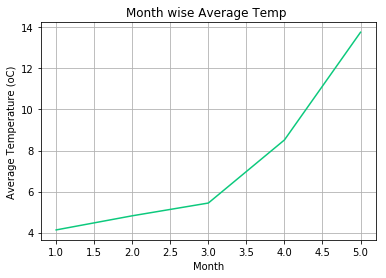

In [9]:
plt.plot(y,color="#0cc97d")
plt.title('Month wise Average Temp ')
plt.grid()
plt.xlabel('Month')
plt.ylabel("Average Temperature (oC)")

## Relation between Temperature Humidity and power consumption

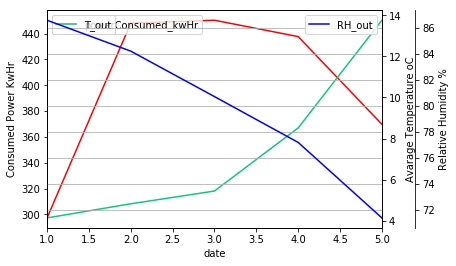

In [10]:
ax1=x.plot(kind='line',color='red')
ax2=ax1.twinx()
ax3=ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))
ax2.set_ylabel(ylabel='Avarage Temperature oC')
ax3.spines['right'].set_position(('axes',1.1))
ax3.set_ylabel(ylabel='Relative Humidity %')

ax1.set_ylabel(ylabel="Consumed Power KwHr")
y.plot(ax=ax2,color="#0cc97d")
m.plot(ax=ax3,color='blue')
line1,label1=ax1.get_legend_handles_labels()
line2,label2=ax2.get_legend_handles_labels()
line3,label3=ax3.get_legend_handles_labels()
ax1.legend(line1,label1,loc=2)
ax2.legend(line2,label2,loc='best')
ax3.legend(line3,label3,loc=0)
plt.grid()
plt.xlabel('month')
plt.show()

In [11]:
df4=df.copy()
df4['date'] = pd.to_datetime(df4['date'], format='%d/%m/%y %H:%M')
df_datetotal = pd.DataFrame({'date': df4['date'], 'Appliances': df4['target_appliances']})
df_datetotal.date=df_datetotal.date.astype('datetime64[ns]')
df_datetotal.set_index('date', inplace=True)

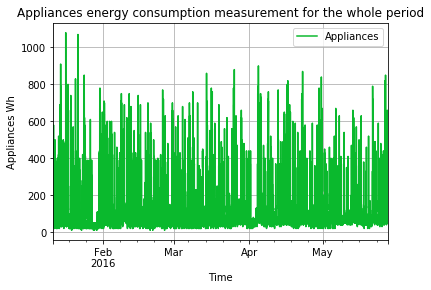

In [12]:
df_datetotal.plot(color="#0ab92d")
plt.rcParams["figure.figsize"] = (18,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

The Use of Appliance is flatuating along the time line instead of having a stable line. 
It may be because of time in a day or day of the week.

## Contribution of Appliance and Light to the total power Consumptions

<Figure size 1440x1440 with 0 Axes>

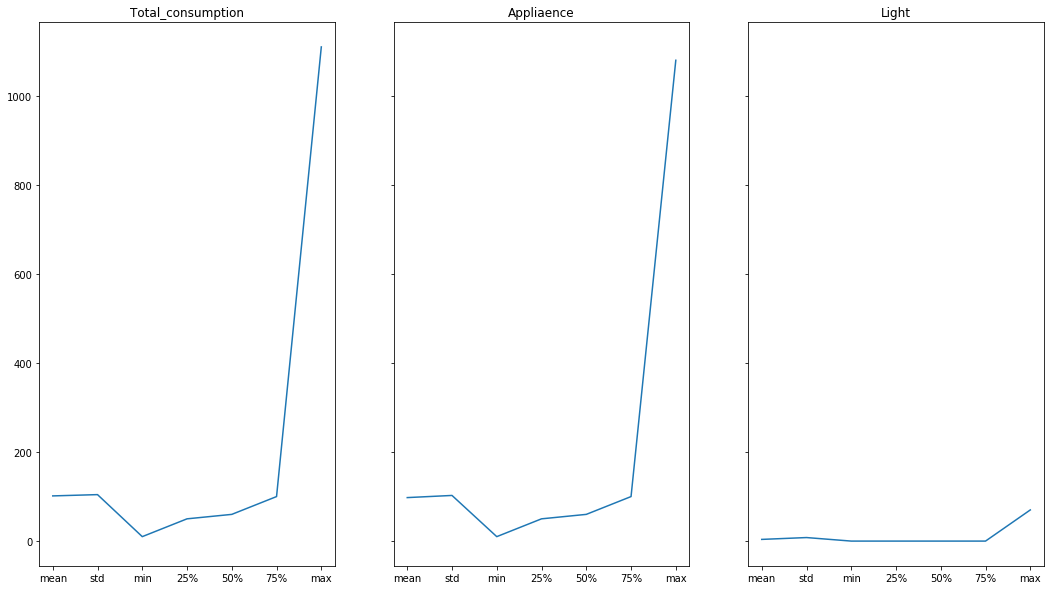

In [13]:
fig=plt.figure(figsize=(20,20))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey='row')
x=df3.describe().drop('count',axis=0)
target_APPL=x.target_appliances
target_total=x.target_total
target_light=x.target_lights
ax2.plot(target_APPL)
ax2.set_title('Appliaence')
ax1.plot(target_total)
ax1.set_title('Total_consumption')
ax3.plot(target_light)
ax3.set_title('Light')
plt.show()

<h3>The week we had Energy Spike<h3>

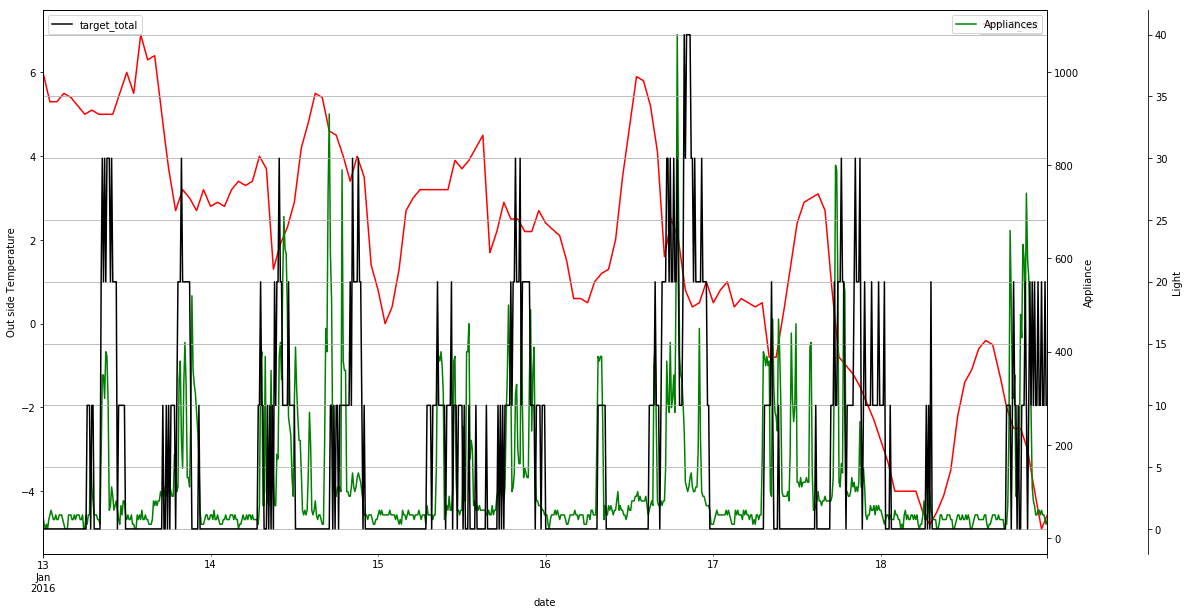

In [14]:
df4=df.copy()
df4['date'] = pd.to_datetime(df4['date'], format='%d/%m/%y %H:%M')
df_datetotal = pd.DataFrame({'date': df4['date'], 'Appliances': df4['target_appliances']})
df_datetotal.date=df_datetotal.date.astype('datetime64[ns]')
df_datetotal.set_index('date', inplace=True)

df_dateTout = pd.DataFrame({'date': df['date'], 'T_out': df['T_out']})
df_dateTout.date=df_dateTout.date.astype('datetime64[ns]')
df_dateTout.set_index('date', inplace=True)

df_dateLight = pd.DataFrame({'date': df['date'], 'target_total': df['target_lights']})
df_dateLight.date=df_dateLight.date.astype('datetime64[ns]')
df_dateLight.set_index('date', inplace=True)
d1='2016-01-12'
d2='2016-01-18'

ax1=df_dateTout[d1:d2].plot(kind='line',color='red')
ax2=ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))
df_datetotal[d1:d2].plot(ax=ax2,color='green')
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes',1.1))
df_dateLight[d1:d2].plot(ax=ax3,color='black')
line1,label1=ax1.get_legend_handles_labels()
line2,label2=ax2.get_legend_handles_labels()
line3,label3=ax3.get_legend_handles_labels()
ax1.set_ylabel(ylabel='Out side Temperature')
ax2.set_ylabel(ylabel='Appliance')
ax3.set_ylabel(ylabel='Light')
ax1.legend(line1,label1,loc=0)
ax2.legend(line2,label2,loc=1)
ax3.legend(line3,label3,loc=2)
plt.grid()
plt.show()

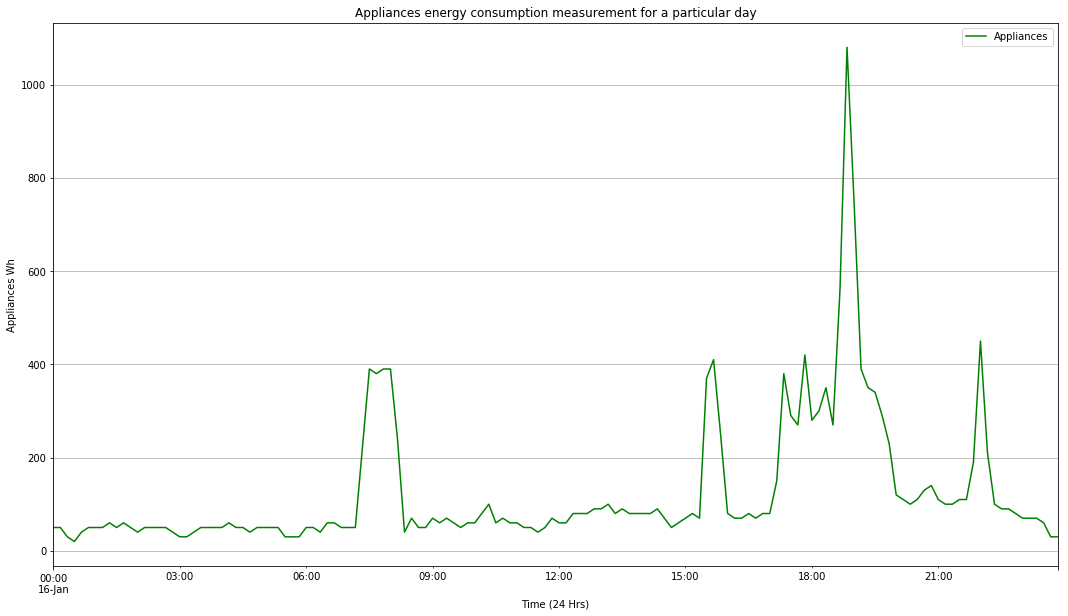

In [15]:
df_datetotal['2016-01-16':'2016-01-16'].plot(color="green")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a particular day')
plt.grid()
plt.xlabel('Time (24 Hrs)')
plt.ylabel('Appliances Wh')
plt.show()

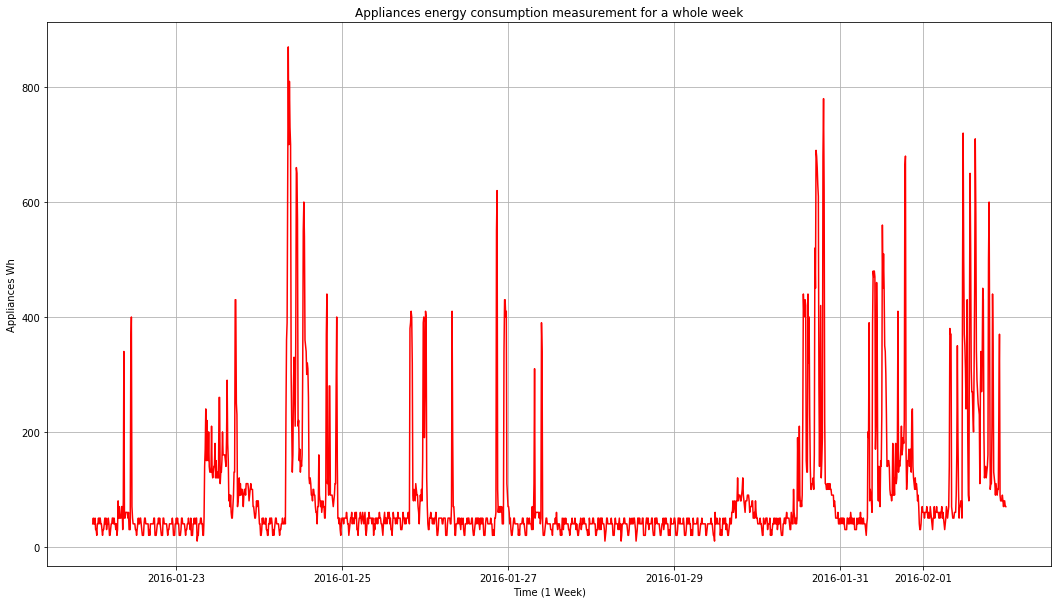

In [16]:
df_flat = df.copy()
df_flat['date'] = pd.to_datetime(df_flat['date'], format='%d/%m/%y %H:%M')
df_flat = df_flat.set_index('date')
df_flat = df_flat['2016-01-22':'2016-02-01']

plt.plot(df_flat['target_total'], color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()


<h1>Renaming The Features</h1>

In [17]:
# Rename columns for readability
nameChangedTo=['date', 'target_appliances', 'target_lights', 'target_total', 'T_kitchen', 
               'RH_kitchen', 'T_living', 'RH_living', 'T_laundry', 'RH_laundry', 'T_office', 
               'RH_office', 'T_bathroom', 'RH_bathroom', 'T_north', 'RH_north', 'T_ironing', 
               'RH_ironing', 'T_teenRoom', 'RH_teenRoom', 'T_parentsRoom', 'RH_parentsRoom', 
               'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 
               'random1', 'random2']

df.columns = nameChangedTo

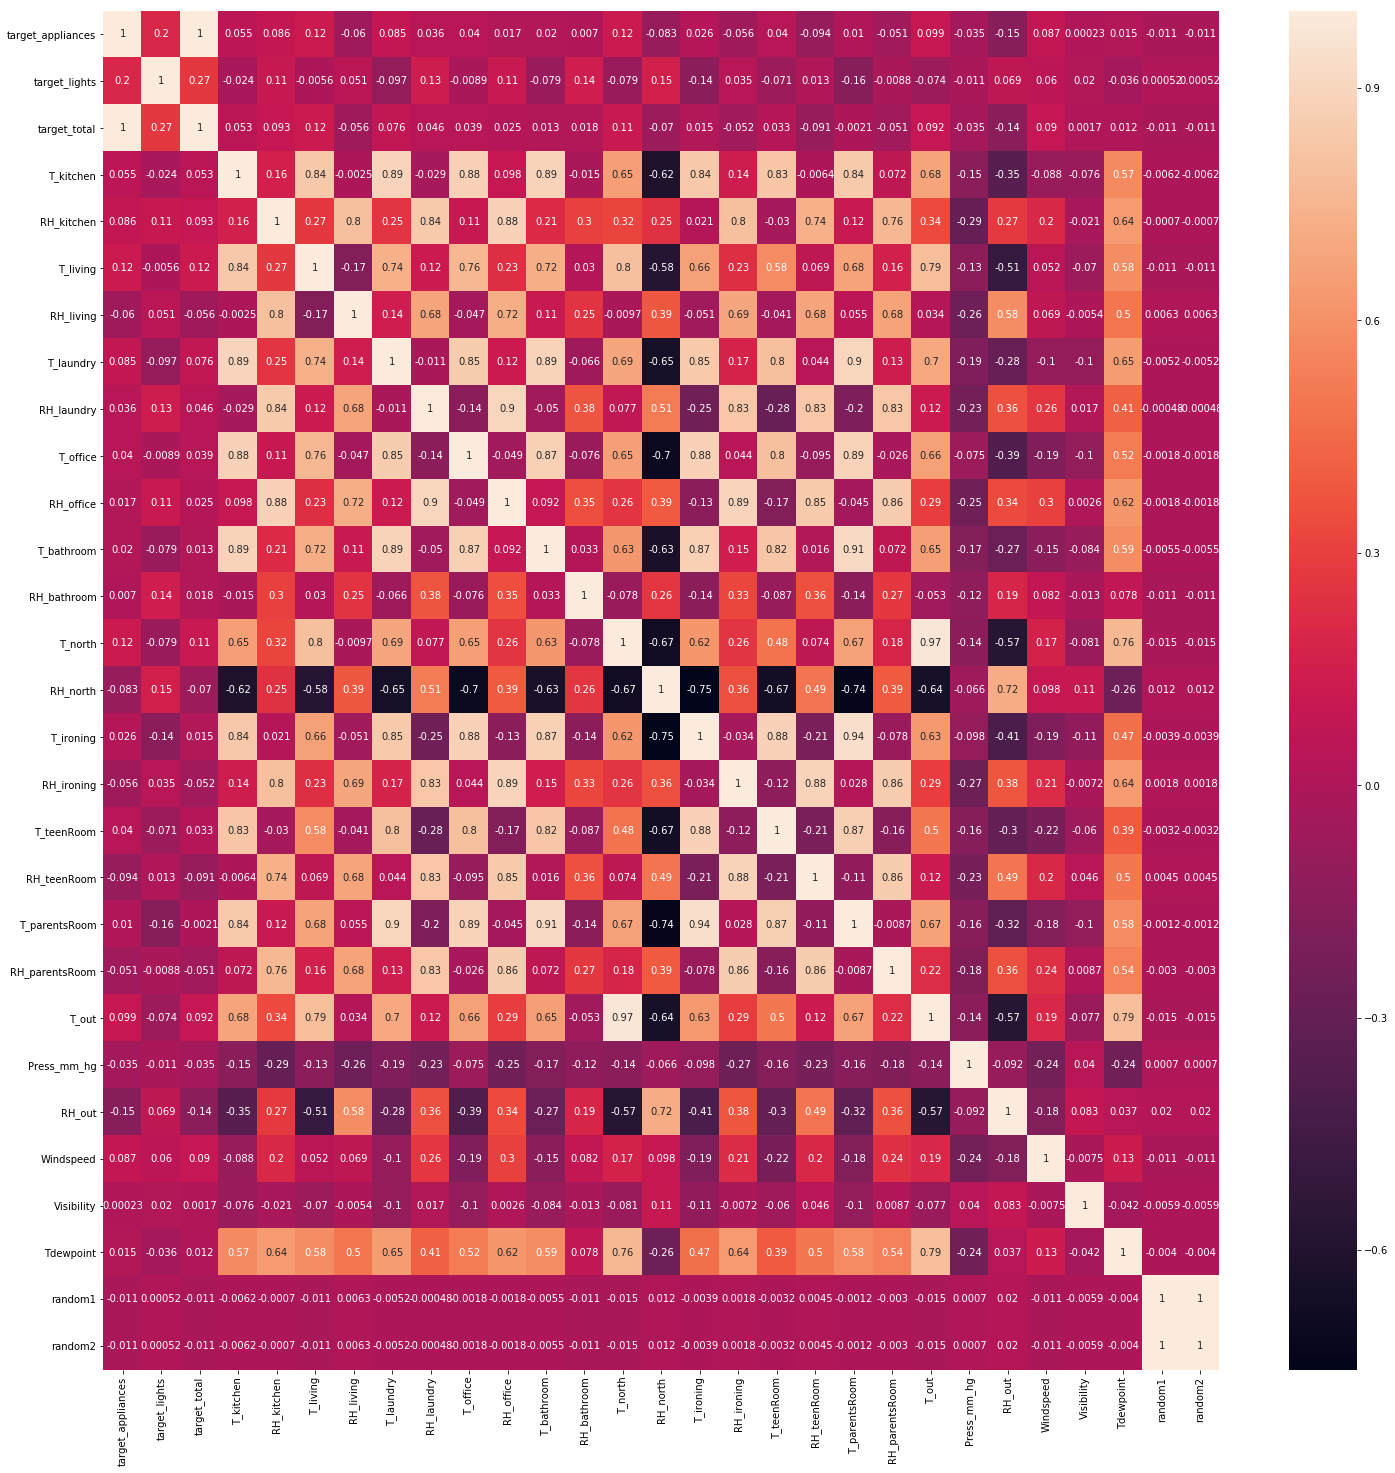

In [18]:
# To find out how each features correlate to each other
plt.figure(figsize=[25,25])
corr = df.corr()
sb.heatmap(corr, annot=True);

The temperature is negatively correlated with humidity. The increase in outside humidity causes the room temperature to drop. Outside temperature has positive correlationship with room temperature which is expected. The target total also has correlationship with outside humidity.

rv1 and rv2 are irrelvant since they don't seem to have strong relation with any feature. We'll perform feature ranking later to see which features are most important.


<h1>Data Preprocessing</h1>

<h3>Calculating the Heating Index<h3>

In [19]:
# This Function must be passed the temperature and the corresponding relative Humidity value to calculate the Heating Index
def calculate_HI(t,r):
    c1=-8.78469475556
    c2 =1.61139411
    c3 =2.33854883889
    c4 =-0.14611605
    c5 =-0.012308094
    c6 =-0.0164248277778
    c7 =0.002211732
    c8 =0.00072546
    c9 =-0.000003582
    R=r
    T=t

    hi=c1+c2*T+c3*R+c4*T*R+c5*T**2+c6*R**2+c7*T**2*R+c8*T*R**2+c9*T**2*R**2
    return hi
    #print("The Heating Index: ",round(hi,2))

In [20]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %H:%M')
df['year'] =df.date.dt.year
df['month'] =df.date.dt.month
df['day'] = df.date.dt.day
df['hour'] = df.date.dt.hour
df['min'] = df.date.dt.minute
df['weekday'] = df.date.dt.dayofweek
df['powerConsumed_kwHr']=df.target_total/1000
df['Heating Index']=calculate_HI(df.T_out,df.RH_out)
# df.drop('date', axis=1, inplace=True)

In [21]:
df.head()

,date,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2,year,month,day,hour,min,weekday,powerConsumed_kwHr,Heating Index
0,2016-01-11 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17,0,0,0.09,36.788294
1,2016-01-11 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17,10,0,0.09,37.218737
2,2016-01-11 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17,20,0,0.08,37.617380
3,2016-01-11 17:30:00,50,40,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,2016,1,11,17,30,0,0.09,38.056703
4,2016-01-11 17:40:00,60,40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17,40,0,0.10,38.500658


## Some Seasonal Variations of Consumption

In [42]:
m=df.groupby([df.weekday]).agg({'powerConsumed_kwHr':'mean'})
m.plot(figsize=[15,5])
plt.ylabel('powerConsumed kwHr')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'weekday'

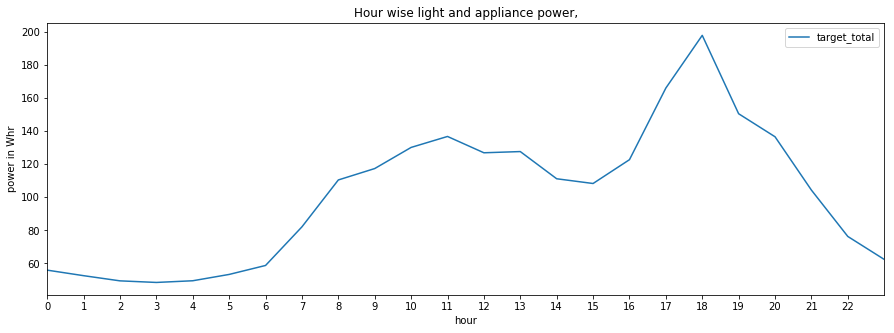

In [23]:

a=df.groupby([df.hour]).agg({'target_total':'mean'})
a.plot(title='Hour wise light and appliance power,', figsize=[15,5], xticks=np.arange(0,23))
plt.ylabel('power in Whr')
plt.show()

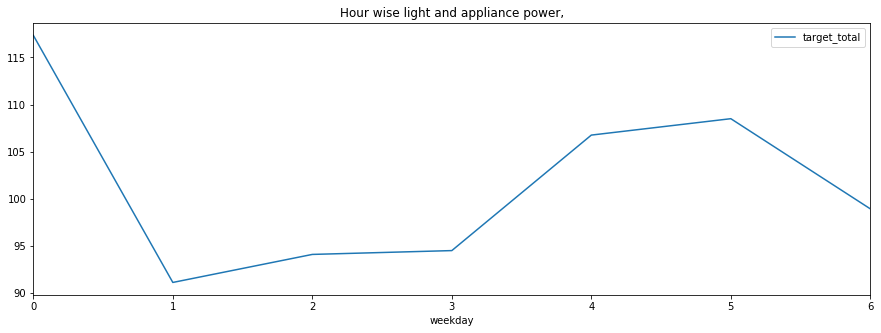

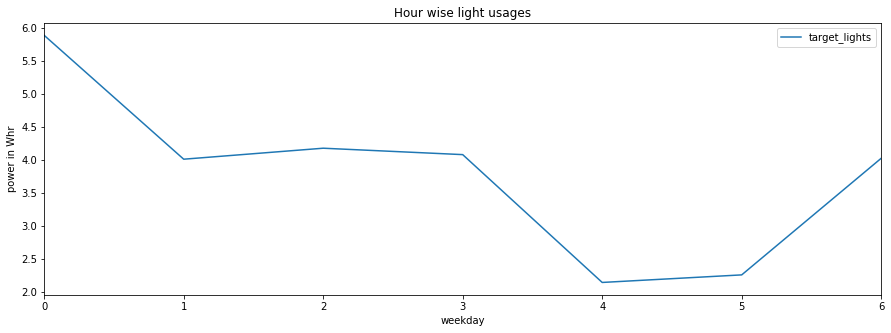

In [24]:
a=df.groupby([df.weekday]).agg({'target_total':'mean'})


a.plot(title='Hour wise light and appliance power,', figsize=[15,5], xticks=np.arange(0,7))
b=df.groupby([df.weekday]).agg({'target_lights':'mean'})
b.plot(title='Hour wise light usages', figsize=[15,5], xticks=np.arange(0,7))
plt.ylabel('power in Whr')
plt.show()

<h1>Feature Scaling</h1>

In [25]:
encoded_weekdays = pd.get_dummies(df['weekday'], dtype='int64')
df.drop('weekday', axis=1, inplace=True)
df = df.join(encoded_weekdays)

df.head(3)

,date,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2,year,month,day,hour,min,powerConsumed_kwHr,Heating Index,0,1,2,3,4,5,6
0,2016-01-11 17:00:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17,0,0.09,36.788294,1,0,0,0,0,0,0
1,2016-01-11 17:10:00,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17,10,0.09,37.218737,1,0,0,0,0,0,0
2,2016-01-11 17:20:00,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.2,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17,20,0.08,37.617380,1,0,0,0,0,0,0


<h3>Dropping the Random variables <h3>

In [26]:
df.drop(['random1', 'random2'],axis=1, inplace=True)

<h3>Removing The outliers in target_total <h3>

In [30]:
df_no_outlier = df[df['target_total']<180]
df_no_outlier.drop(['date','powerConsumed_kwHr'],inplace=True,axis=1)

In [31]:
X = df_no_outlier.drop(['target_appliances','target_lights','target_total'], axis=1)
y_total = df_no_outlier[['target_total']]
y_total.describe()

,target_total
count,17525.000000
mean,70.165478
std,30.699187
min,10.000000
25%,50.000000
50%,60.000000
75%,90.000000
max,170.000000


In [32]:
# put the data into bin based on percentile
# less than 20% -> 1 (very low)
# between 20% and 40% -> 2 (low)
# between 40% and 60% -> 3 (medium)
# between 60% and 80% -> 4 (high)
# between 80% and 100% -> 5 (very high)
# referenced from : https://pdfs.semanticscholar.org/3293/7f53f436ee2601dffb6a68fbd7686bc5d45f.pdf?_ga=2.151741438.692377899.1571303739-1024167811.1571303739

twenty_quantile = int(y_total.quantile(0.2))
fourty_quantile = int(y_total.quantile(0.4))
sixty_quantile = int(y_total.quantile(0.6))
eighty_quantile = int(y_total.quantile(0.8))

In [33]:
def generateClass(x):
    if x<twenty_quantile:
        return 1
    elif (x>=twenty_quantile and x<fourty_quantile):
        return 4
    elif (x>=fourty_quantile and x<sixty_quantile):
        return 3
    elif (x>=sixty_quantile and x<eighty_quantile):
        return 4
    else :
        return 5

y_total_new_cat = y_total["target_total"].apply(generateClass)

<h3>Feature Scaling</h3>

In [34]:
# Normalization

X_normalized = pd.DataFrame(preprocessing.normalize(X), columns=X.columns)
X_normalized.head(3)

,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,T_north,RH_north,T_ironing,RH_ironing,T_teenRoom,RH_teenRoom,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,year,month,day,hour,min,Heating Index,0,1,2,3,4,5,6
0,0.00923,0.022087,0.008909,0.020784,0.009183,0.020756,0.008817,0.021145,0.007966,0.025615,0.003261,0.039098,0.007981,0.019316,0.008445,0.022691,0.007904,0.021128,0.003063,0.340370,0.042691,0.003248,0.029234,0.002459,0.935495,0.000464,0.005104,0.007889,0.000000,0.017071,0.000464,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00923,0.021668,0.008910,0.020753,0.009184,0.020785,0.008817,0.021343,0.007966,0.025616,0.003171,0.039010,0.007982,0.019286,0.008446,0.022675,0.007920,0.021142,0.003007,0.340427,0.042693,0.003094,0.027456,0.002413,0.935523,0.000464,0.005105,0.007889,0.004640,0.017271,0.000464,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00923,0.021486,0.008910,0.020709,0.009184,0.020852,0.008783,0.021296,0.007966,0.025565,0.003044,0.038590,0.007982,0.019228,0.008446,0.022614,0.007889,0.021115,0.002956,0.340481,0.042694,0.002939,0.025678,0.002367,0.935545,0.000464,0.005105,0.007889,0.009281,0.017457,0.000464,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Training Models</h1>

<h3>K fold cross validation for better distribution of train and test data set<h3>

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def k_fold_validation_on_model(model, df_X, df_y):
    k_fold = KFold(n_splits=10, shuffle=True)
    X = np.array(df_X)
    y = np.array(df_y)
    accuracies = []

    for train, test in k_fold.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions) * 100)
    
    return accuracies

<h3>Decision Tree Classifier</h3>

<h5>Feature Selection</h5>

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier(criterion="entropy")
dt_accuracies = k_fold_validation_on_model(dt, X_normalized, y_total_new_cat)

print("Average Accuracy(Decision Tree): ", np.mean(dt_accuracies).round(2))

Average Accuracy(Decision Tree):  63.66


In [38]:
dt_prunned_accuracies = []

for depth in range(10,18):
    dt_prunned = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    accuracies = k_fold_validation_on_model(dt_prunned, X_normalized, y_total_new_cat)
    dt_prunned_accuracies.append( np.mean(accuracies).round(2) )

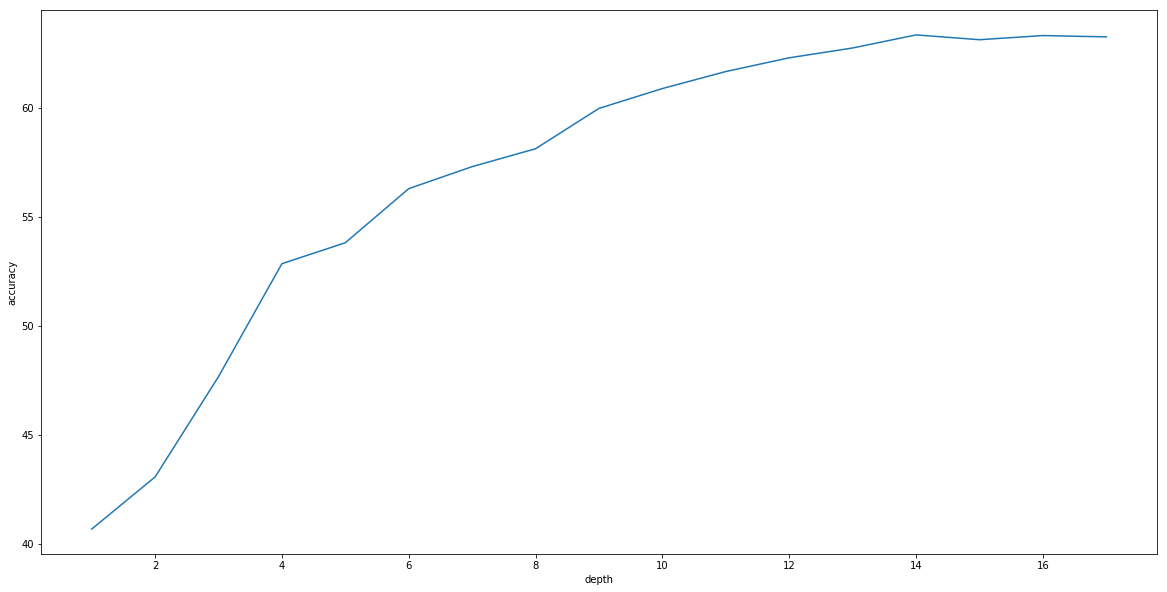

In [39]:
# The accurancy against the depth is plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.plot(np.arange(1,len(dt_prunned_accuracies)+1), dt_prunned_accuracies)
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()

<h3>Random Forest Classifier</h3>

Random Forest uses bagging, feature bagging and Decision Trees. Hence, It will reduce the variance and increase bias compare to decision tree. For depth of each tree, uses max depth to 15.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
sfm = SelectFromModel(DecisionTreeClassifier(criterion='entropy', max_depth=15))
feature_selected_rf = sfm.fit_transform(X_normalized, y_total_new_cat)
rfc = RandomForestClassifier(n_estimators=80, n_jobs=-1, criterion='entropy', max_depth=15)
dt_accuracies = k_fold_validation_on_model(rfc, feature_selected_rf, y_total_new_cat)

print("Average Accuracy(Random Forest): ", np.mean(dt_accuracies).round(2))

Average Accuracy(Random Forest):  68.51

































Random Forest performs slightly better than Decision tree, as multiple decision trees are used for decision making, each tree having different samples (bagging) and feature (feature bagging)


<h3>Extreme Gradient Boosting Classifier</h3>

In [41]:
import xgboost
train_X, test_X, train_y, test_y = train_test_split(X_normalized, y_total_new_cat,test_size=0.1,random_state=67)
xbc = xgboost.XGBClassifier(n_estimators=100, n_jobs=-1, max_depth=15)
xbc.fit(train_X, train_y)
predictions = xbc.predict(test_X)
print("accuracy(Extreme Gradient Boosting): ",round(accuracy_score(test_y, predictions),2)*100)

accuracy(Extreme Gradient Boosting):  68.0
